In [1]:
import time
import pandas as pd
from denmune import DenMune

using NGT, Proximity matrix has been calculated  in:  0.001495361328125  seconds
Dataset's Groundtruht


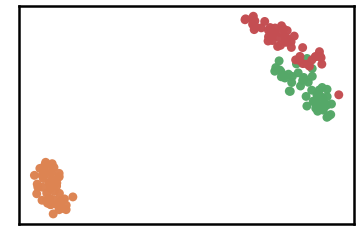



There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 41 clusters 



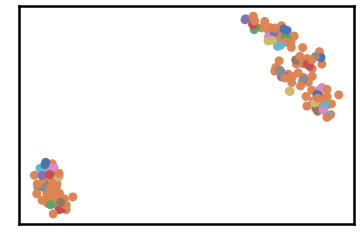

k= 1 :Validity score is: 0.1377410468319559 but best score is 0.1377410468319559 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.001295328140258789  seconds
k= 2 :Validity score is: 0.0823045267489712 but best score is 0.1377410468319559 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0013263225555419922  seconds
There are 13 outlier point(s) in black (noise of type-1) represent 9% of total points
There are 8 weak point(s) in light grey (noise of type-2) represent 5% of total points
DenMune detected 23 clusters 



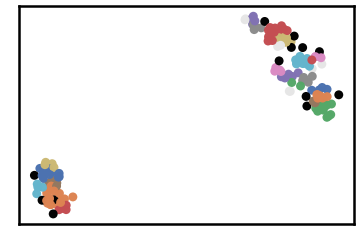

k= 3 :Validity score is: 0.35855241861915943 but best score is 0.35855241861915943 at k= 3     

using NGT, Proximity matrix has been calculated  in:  0.0013971328735351562  seconds
There are 3 outlier point(s) in black (noise of type-1) represent 2% of total points
There are 8 weak point(s) in light grey (noise of type-2) represent 5% of total points
DenMune detected 11 clusters 



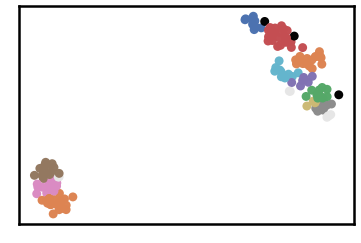

k= 4 :Validity score is: 0.5207404318116198 but best score is 0.5207404318116198 at k= 4     

using NGT, Proximity matrix has been calculated  in:  0.0014393329620361328  seconds
There are 2 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 9 weak point(s) in light grey (noise of type-2) represent 6% of total points
DenMune detected 7 clusters 



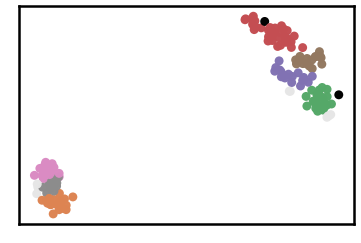

k= 5 :Validity score is: 0.6750316564982157 but best score is 0.6750316564982157 at k= 5     

using NGT, Proximity matrix has been calculated  in:  0.0014979839324951172  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 3 weak point(s) in light grey (noise of type-2) represent 2% of total points
DenMune detected 6 clusters 



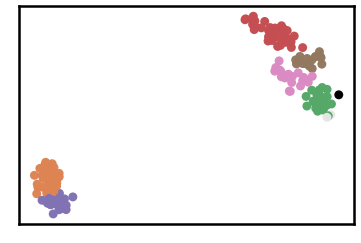

k= 6 :Validity score is: 0.7452859836580766 but best score is 0.7452859836580766 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.002547740936279297  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 5 clusters 



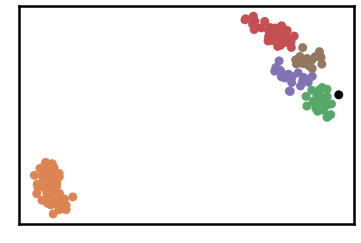

k= 7 :Validity score is: 0.8416093710211358 but best score is 0.8416093710211358 at k= 7     

using NGT, Proximity matrix has been calculated  in:  0.0016624927520751953  seconds
k= 8 :Validity score is: 0.833234067897558 but best score is 0.8416093710211358 at k= 7     

using NGT, Proximity matrix has been calculated  in:  0.0018644332885742188  seconds
There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 3 clusters 



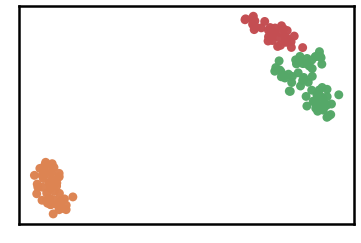

k= 9 :Validity score is: 0.9048007615939072 but best score is 0.9048007615939072 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.0017011165618896484  seconds
k= 10 :Validity score is: 0.89769820971867 but best score is 0.9048007615939072 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.0019614696502685547  seconds
k= 11 :Validity score is: 0.89769820971867 but best score is 0.9048007615939072 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.0018887519836425781  seconds
k= 12 :Validity score is: 0.89769820971867 but best score is 0.9048007615939072 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.002096891403198242  seconds
k= 13 :Validity score is: 0.8905309250136836 but best score is 0.9048007615939072 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.002117156982421875  seconds
k= 14 :Validity score is: 0.8905309250136836 but best score is 0.9048007615939072 at k= 9     

using NG

<Figure size 432x288 with 0 Axes>

In [2]:
# Denmune's Paramaters
# DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_plot=show_plot, show_noise=show_noise)
dataset = 'iris' # let us take iris dataset as an example
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

# loop's parameters
start = 1
step = 1
end=15

# Validity indexes' parameters
validity_val = -1
best_k = 0
best_val = -1

validity_idx = 2 # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])


for n in range(start, end+1, step):
    start_time = time.time()
    dm = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_noise=show_noise)
    labels_true, labels_pred = dm.output_Clusters()
    if show_plot == True and n==start:
        # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
        print ("Dataset\'s Groundtruht")
        dm.plot_clusters(labels_true, ground=True)
        print('\n', "=====" * 20 , '\n')       
               
    end_time = time.time()
    
    validity_indexes = dm.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end_time - start_time
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        # Let us show results where only an improve in accuracy is detected
        if show_plot:
            dm.plot_clusters(labels_pred, show_noise=show_noise)
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'at k=', best_k , end='     ')
            
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n', "=====" * 20 , '\n')
    

In [3]:
# It is time to save the results
para_file = 'denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(para_file, index=False, sep='\t', header=True)

In [4]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
8,9.0,136.0,0.904801,0.805694,0.803229,0.759199,0.795982,0.815646,0.016187
9,10.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.016589
10,11.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.019969
11,12.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.017651
14,15.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.020480
12,13.0,134.0,0.890531,0.790679,0.788012,0.732298,0.778177,0.803589,0.019967
13,14.0,134.0,0.890531,0.790679,0.788012,0.732298,0.778177,0.803589,0.019429
6,7.0,112.0,0.841609,0.785760,0.779979,0.721393,0.951927,0.668983,0.072203
7,8.0,123.0,0.833234,0.746318,0.741670,0.684463,0.786923,0.709698,0.016994
5,6.0,90.0,0.745286,0.711395,0.701113,0.556682,0.953145,0.567466,0.013672
